In [0]:
!pip install tensorflow-gpu==2.0.0

In [11]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Input, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
tf.__version__

'2.0.0'

In [0]:
# Load the dataset

cifar10 = tf.keras.datasets.cifar10

In [13]:
# Divide it into train and test data

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [14]:
# Preprocess the input values of X by dividing them all with max value i.e. 255.0
X_train, X_test = X_train / 255.0, X_test / 255.0

# Change the shape of Y from (A, 1) to (A) as output layer is linear
Y_train, Y_test = Y_train.flatten(), Y_test.flatten()

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


In [15]:
# number pf labels of Y are
K = len(set(Y_train))
print('No. of LABELS: ', K)

No. of LABELS:  10


In [0]:
# Building the model
i = Input(shape = X_train[0].shape)

#x = Conv2D(32, (3, 3), strides = 2, activation = 'relu')(i)
#x = Conv2D(64, (3, 3), strides = 2, activation = 'relu')(x)
#x = Conv2D(128, (3, 3), strides = 2, activation = 'relu')(x)

x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation ='relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation ='relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation ='relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i, x)

In [0]:
# Compiling the model

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## Fit the model without Data Augmentation

In [8]:
# Fit the model

r = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 50)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 20s 398us/sample - loss: 1.2932 - accuracy: 0.5500 - val_loss: 1.1935 - val_accuracy: 0.5984
Epoch 2/50
50000/50000 [==============================] - 12s 233us/sample - loss: 0.8396 - accuracy: 0.7107 - val_loss: 1.0151 - val_accuracy: 0.6476
Epoch 3/50
50000/50000 [==============================] - 12s 235us/sample - loss: 0.6866 - accuracy: 0.7649 - val_loss: 0.7618 - val_accuracy: 0.7457
Epoch 4/50
50000/50000 [==============================] - 12s 237us/sample - loss: 0.5794 - accuracy: 0.8005 - val_loss: 0.7638 - val_accuracy: 0.7427
Epoch 5/50
50000/50000 [==============================] - 12s 238us/sample - loss: 0.4934 - accuracy: 0.8322 - val_loss: 0.6244 - val_accuracy: 0.7937
Epoch 6/50
50000/50000 [==============================] - 12s 234us/sample - loss: 0.4138 - accuracy: 0.8573 - val_loss: 0.5994 - val_accuracy: 0.8146
Epoch 7/50
50000/50000 [====================

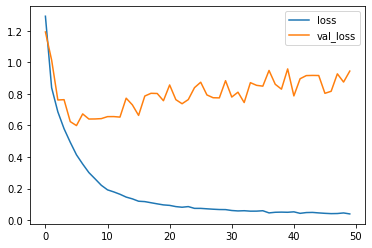

In [9]:
# Plot of loss per iteration

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

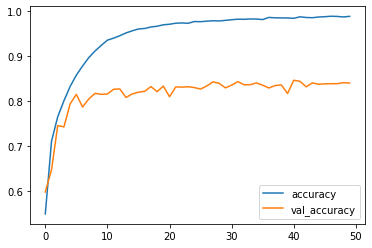

In [10]:
# Plot of accuracy per iteration

plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

## Fit the model with Data Augmentation

In [19]:
# Fit the model with Data Augmentation
# Restart the kernel

batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, Y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(X_test, Y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 102s 65ms/step - loss: 1.4793 - accuracy: 0.4875 - val_loss: 1.1769 - val_accuracy: 0.5998
Epoch 2/50
1562/1562 [==============================] - 101s 65ms/step - loss: 1.0015 - accuracy: 0.6487 - val_loss: 1.0147 - val_accuracy: 0.6663
Epoch 3/50
1562/1562 [==============================] - 101s 65ms/step - loss: 0.8491 - accuracy: 0.7085 - val_loss: 1.0027 - val_accuracy: 0.6686
Epoch 4/50
1562/1562 [==============================] - 100s 64ms/step - loss: 0.7621 - accuracy: 0.7381 - val_loss: 0.7336 - val_accuracy: 0.7573
Epoch 5/50
1562/1562 [==============================] - 100s 64ms/step - loss: 0.6907 - accuracy: 0.7634 - val_loss: 0.6171 - val_accuracy: 0.7928
Epoch 6/50
1562/1562 [==============================] - 100s 64ms/step - loss: 0.6341 - accuracy: 0.7844 - val_loss: 0.7415 - val_accuracy: 0.7524
Epoch 7/50
1562/1562 [==============================] - 100s 64ms/step - loss: 0.5952 - accuracy: 0.7962 - val_loss: 0

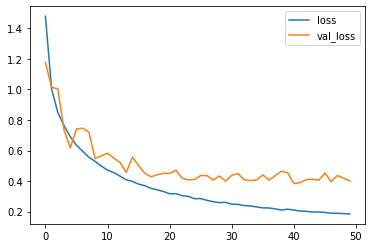

In [20]:
# Plot of loss per iteration

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

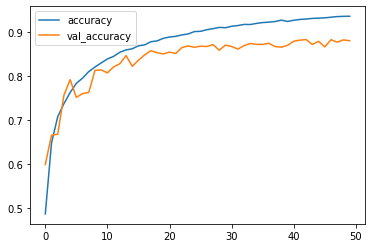

In [21]:
# Plot of accuracy per iteration

plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[909   3  36   8   5   1   5   3  25   5]
 [  6 941   1   1   0   0   4   0  10  37]
 [ 22   0 864  35  25  18  31   2   1   2]
 [ 24   2  35 768  33  61  56  10   3   8]
 [  6   1  22  32 888  14  30   4   3   0]
 [  9   1  22 122  30 787  19   5   0   5]
 [  7   1  22  19   3   0 945   0   1   2]
 [ 13   0  18  36  34  31   9 848   2   9]
 [ 37  10   4   5   2   1   5   0 919  17]
 [ 10  28   1   2   2   0   6   0   8 943]]


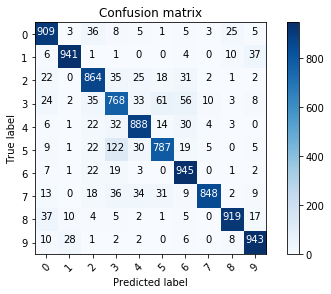

In [23]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(Y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [0]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

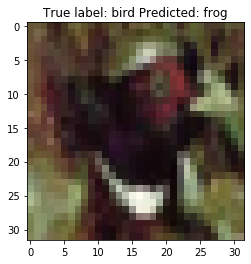

In [28]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != Y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[Y_test[i]], labels[p_test[i]]));